# Context
1 Data Cleansing

2 States Education Data Analysis

    2.1 Students Grade and Different Investment Ratio
        2.1.1 Result
    2.2 Students Grade and Education Revenue per Student
        2.2.1 Cluster Model 
        2.2.2 Neurons Network 
        2.2.3 Random Forest 
        2.2.4 Multinomial Naive Bayes Classifier 
        2.2.5 Gaussian naive bayes 
        2.2.6 Decision Tree 
        2.2.7 KNN 
        2.2.8 Logistic Regression 
        2.2.9 SVM
        2.2.10 Result for Models
3 Overall Result

# 1 Data Cleansing

In [28]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [29]:
file_list = ['enroll_states.csv', 'finance_states.csv', 'naep_states.csv', 'states_all.csv', 'states_all_extended.csv']

Enroll

In [30]:
enroll = pd.read_csv(os.path.join('data',file_list[0]))
enroll.head()

,PRIMARY_KEY,STATE,YEAR,A_A_A,G01_A_A,G02_A_A,G03_A_A,G04_A_A,G05_A_A,G06_A_A,...,PK_BL_F,PK_BL_M,PK_HI_F,PK_HI_M,PK_HP_F,PK_HP_M,PK_TR_F,PK_TR_M,PK_WH_F,PK_WH_M
0,1986_ALABAMA,ALABAMA,1986,733735.0,64231.0,57357.0,58682.0,56939.0,53977.0,56059.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1987_ALABAMA,ALABAMA,1987,729234.0,62293.0,59613.0,60235.0,56671.0,56996.0,55025.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1988_ALABAMA,ALABAMA,1988,724751.0,61324.0,58390.0,62462.0,57531.0,57035.0,57592.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1989_ALABAMA,ALABAMA,1989,723743.0,60669.0,57909.0,61085.0,59944.0,57958.0,57601.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1990_ALABAMA,ALABAMA,1990,721806.0,60230.0,57414.0,60713.0,58666.0,60227.0,58794.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Finance

In [31]:
finance = pd.read_csv(os.path.join('data',file_list[1]))
finance.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885,304177,1659028,715680,2653798,1481703,735036,NaN,174053
1,1992_ALASKA,ALASKA,1992,NaN,1049591,106780,720711,222100,972488,498362,350902,NaN,37451
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079,297888,1369815,1590376,3401580,1435908,1007732,NaN,609114
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959,178571,958785,574603,1743022,964323,483488,NaN,145212
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025,2072470,16546514,7641041,27138832,14358922,8520926,NaN,2044688


Naep

In [32]:
naep = pd.read_csv(os.path.join('data',file_list[2]))
naep.head()

,PRIMARY_KEY,STATE,YEAR,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,2017_ALABAMA,ALABAMA,2017,232.170688,268.312020,216.419814,257.686520
1,2017_ALASKA,ALASKA,2017,230.456278,277.015572,207.037630,257.667497
2,2017_ARIZONA,ARIZONA,2017,234.435788,282.248145,215.465952,262.957457
3,2017_ARKANSAS,ARKANSAS,2017,233.848144,273.759907,216.108026,259.955798
4,2017_CALIFORNIA,CALIFORNIA,2017,232.262941,276.638200,215.421814,262.520630


States all

In [33]:
states_all = pd.read_csv(os.path.join('data',file_list[3]))
states_all.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.398961,260.892247,196.764414,NaN


States all extend

In [34]:
states_all_ext = pd.read_csv(os.path.join('data',file_list[4]))
states_all_ext.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,PK_HP_F,PK_HP_M,PK_TR_F,PK_TR_M,PK_WH_F,PK_WH_M,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,NaN,NaN,NaN,NaN,NaN,NaN,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,NaN,NaN,NaN,NaN,NaN,NaN,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,NaN,NaN,NaN,NaN,NaN,NaN,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,NaN,NaN,NaN,NaN,NaN,NaN,208.398961,260.892247,196.764414,NaN


# 2 States Education Data Analysis

## 2.1 Analysis between students grade and different investment ratio

In [35]:
cols = ['PRIMARY_KEY','STATE','TOTAL_REVENUE','AVG_MATH_4_SCORE','AVG_MATH_8_SCORE','AVG_READING_4_SCORE','AVG_READING_8_SCORE']
states1 = states_all[cols]
states2 = states1.iloc[0:1275]
states3 = states2.fillna(method='ffill')
states4 = states3.fillna(method='bfill')
states4['SUM_SCORE'] = states4[['AVG_MATH_4_SCORE','AVG_MATH_8_SCORE','AVG_READING_4_SCORE','AVG_READING_8_SCORE']].apply(lambda x: x.sum(), axis=1)
cols2 = ['PRIMARY_KEY','STATE','TOTAL_REVENUE','SUM_SCORE']
states5 = states4[cols2]

In [36]:
# Delete the data in 1992, 1993, 1997, 2000, 2001
# because of missing data in those years
temp = states5[-1173:]
temp = temp[~temp.PRIMARY_KEY.str.contains("1997")]
temp = temp[~temp.PRIMARY_KEY.str.contains("2000")]
temp = temp[~temp.PRIMARY_KEY.str.contains("2001")]
data_score = temp.SUM_SCORE.values

In [37]:
# Select MA data
MA_score = temp[temp.STATE == 'MASSACHUSETTS']
MA_score

,PRIMARY_KEY,STATE,TOTAL_REVENUE,SUM_SCORE
123,1994_MASSACHUSETTS,MASSACHUSETTS,6410757.0,983.762210
174,1995_MASSACHUSETTS,MASSACHUSETTS,7326904.0,983.762210
225,1996_MASSACHUSETTS,MASSACHUSETTS,7129757.0,981.531661
327,1998_MASSACHUSETTS,MASSACHUSETTS,7726497.0,971.509366
378,1999_MASSACHUSETTS,MASSACHUSETTS,8388120.0,971.509366
531,2002_MASSACHUSETTS,MASSACHUSETTS,11217085.0,984.712440
582,2003_MASSACHUSETTS,MASSACHUSETTS,11591832.0,1022.198450
633,2004_MASSACHUSETTS,MASSACHUSETTS,11979937.0,1004.772582
684,2005_MASSACHUSETTS,MASSACHUSETTS,12976279.0,1031.143716
735,2006_MASSACHUSETTS,MASSACHUSETTS,14160242.0,1006.510267


In [38]:
# Select different fields of investment
import pandas as pd

# data.csv
data = pd.read_csv("data/data.csv") 
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
data = data[data.States != 'United States']
#print(data)
data_com = data.Compensatory.values
#print(data_com)
data_tot = data.Total.values
#print(data_tot)
data_spe = data['special education'].values
data_chi = data['Child nutrition'].values
data_voc = data.Vocational.values
data_oth = data.others.values


for j in range(1020):
    data_com[j] = data_com[j] / data_tot[j]
    data_spe[j] = data_spe[j] / data_tot[j]
    data_chi[j] = data_chi[j] / data_tot[j]
    data_voc[j] = data_voc[j] / data_tot[j]
    data_oth[j] = data_oth[j] / data_tot[j]

MA_data = data[data.States == 'Massachusetts']
data

,Year,States,Total,Compensatory,special education,Child nutrition,Vocational,others
1,1994,Alabama,319876.0,0.395766,0.127574,0.340341,0.034260,0.102058
2,1994,Alaska,40979.0,0.239147,0.127675,0.320554,0.061300,0.251324
3,1994,Arizona,265785.0,0.361668,0.092770,0.318754,0.043772,0.183035
4,1994,Arkansas,175451.0,0.414834,0.110025,0.384284,0.033023,0.057834
5,1994,California,1827370.0,0.402013,0.136687,0.357610,0.031270,0.072420
...,...,...,...,...,...,...,...,...
1035,2016,Virginia,910631.0,0.255235,0.275800,0.364006,0.018732,0.086227
1036,2016,Washington,879635.0,0.279154,0.250796,0.291375,0.007712,0.170962
1037,2016,West Virginia,343157.0,0.266219,0.215219,0.348004,0.014046,0.156511
1038,2016,Wisconsin,730105.0,0.273214,0.234125,0.283174,0.007240,0.202246


In [39]:
MA_score=MA_score.reset_index(drop=True)
MA_data=MA_data.reset_index(drop=True)

Here is the MA data and score

In [40]:
pd.concat([MA_data, MA_score.SUM_SCORE],axis=1)

,Year,States,Total,Compensatory,special education,Child nutrition,Vocational,others,SUM_SCORE
0,1994,Massachusetts,306293.0,0.432978,0.193707,0.196913,0.041023,0.135380,983.762210
1,1995,Massachusetts,293208.0,0.386630,0.194521,0.208265,0.035514,0.175070,983.762210
2,1996,Massachusetts,284045.0,0.427450,0.208875,0.229062,0.038036,0.096576,981.531661
3,1998,Massachusetts,345429.0,0.414053,0.216172,0.277504,0.009941,0.082330,971.509366
4,1999,Massachusetts,395568.0,0.000000,0.225741,0.255552,0.028124,0.490583,971.509366
5,2002,Massachusetts,559293.0,0.318511,0.276735,0.226949,0.022714,0.155090,984.712440
6,2003,Massachusetts,669009.0,0.309378,0.297289,0.188959,0.018088,0.186286,1022.198450
7,2004,Massachusetts,727241.0,0.337376,0.292026,0.161259,0.017038,0.192301,1004.772582
8,2005,Massachusetts,722546.0,0.309046,0.329435,0.172478,0.017094,0.171948,1031.143716
9,2006,Massachusetts,703765.0,0.306631,0.339907,0.167211,0.018479,0.167772,1006.510267


In [41]:
from numpy import savetxt
temp = np.column_stack((data_com,data_spe,data_chi,data_voc,data_oth,data_score))
savetxt('data/temp.csv', temp, delimiter=',')

Here we use cluster model to classify 5 groups for different investment ratio

   compensatory  special_edu  child_nutr  vocational    others        grade  \
0      0.317935     0.166543    0.262836    0.031112  0.221574   984.873561   
1      0.268465     0.225793    0.229248    0.014147  0.262324  1024.240822   
2      0.372404     0.116946    0.292407    0.030563  0.187680   927.158777   
3      0.263153     0.215649    0.223351    0.018445  0.279402  1005.476369   
4      0.310572     0.157155    0.274925    0.032473  0.224877   969.784123   

   Group Count  
0          239  
1          379  
2           18  
3          231  
4          153  


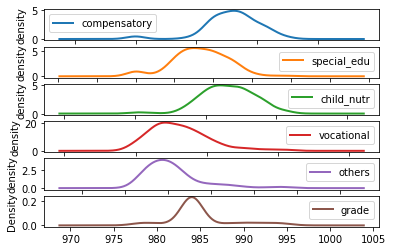

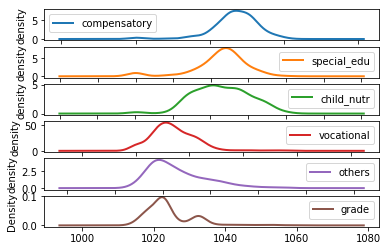

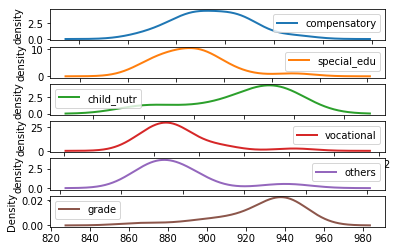

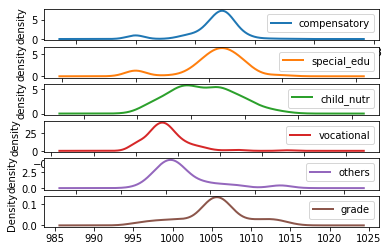

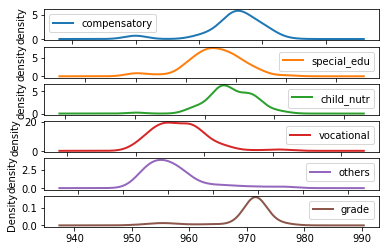

In [42]:
from sklearn.cluster import KMeans

inputfile = 'data/temp.csv' # input file
outputfile = 'data/cluster1.xlsx' # output file
k = 5                       # group number
iteration = 500             # max loops

# read input file
data = pd.read_csv(inputfile, header=None,names=['compensatory','special_edu','child_nutr','vocational','others','grade']) #读取数据

# k-means
kmodel = KMeans(n_clusters = k, n_jobs = 4)
kmodel.fit(data)

r1 = pd.Series(kmodel.labels_).value_counts()  # count the numbers in each group
r2 = pd.DataFrame(kmodel.cluster_centers_)     # cluster centers
r = pd.concat([r2, r1], axis = 1) 
r.columns = list(data.columns) + [u'Group Count'] 
print(r)

r = pd.concat([data, pd.Series(kmodel.labels_, index = data.index)], axis = 1)  
r.columns = list(data.columns) + [u'Group Type'] 
r.to_excel(outputfile) # save the data

def density_plot(data): 
    p = data.plot(kind='kde', linewidth = 2, subplots = True, sharex = False)
    [p[i].set_ylabel('density') for i in range(k)]
    plt.legend()
    return plt

for i in range(k):
    density_plot(data[r[u'Group Type']==i])

In [43]:
# Here is the cluster for MA comparing with the MA data before
for i in range(21,1020,51):
    print(pd.Series(kmodel.labels_)[i])

0
0
0
4
4
0
1
3
1
3
1
1
1
1
1
1
1
1
1
1


## 2.1.1 Result

According to the cluster groups, we can see group 1 and group 3(when you rerun the code, the group number can be changed, but choose the two highest groups) have higher grade than other groups. In group 1 and 3, the percentage of compensatory is lower than others, the percentage of speical education is higher, the percentage of child nutrition is lower and the percnetage of vocational is much lower.
We also selected the data from MA state, and we can see that from 2003, MA state is alway in the first two groups which means MA has great students grade all the time.

# 2.2 Analysis between education revenue per student and students grade

In [44]:
# First get the number of student for each state
states6 = states5[~states5.PRIMARY_KEY.str.contains("1992")]
enroll = states_all_ext[~states_all_ext.PRIMARY_KEY.str.contains("1992")]
enroll

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,PK_HP_F,PK_HP_M,PK_TR_F,PK_TR_M,PK_WH_F,PK_WH_M,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
51,1993_ALABAMA,ALABAMA,1993,727716.0,2827391.0,331409.0,1729295.0,766687.0,2833433.0,1564558.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,1993_ALASKA,ALASKA,1993,121156.0,1191398.0,176150.0,775829.0,239419.0,1126398.0,494917.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,1993_ARIZONA,ARIZONA,1993,676297.0,3427976.0,318465.0,1415407.0,1694104.0,3623946.0,1578889.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,1993_ARKANSAS,ARKANSAS,1993,311432.0,1346909.0,128196.0,771079.0,447634.0,1376067.0,782791.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,1993_CALIFORNIA,CALIFORNIA,1993,5129788.0,28043338.0,2151157.0,17064146.0,8828035.0,28110986.0,15281147.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1913,2017_NORTH_DAKOTA,NORTH_DAKOTA,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,244.243515,288.172322,221.519266,262.720477
1914,2017_RHODE_ISLAND,RHODE_ISLAND,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,237.554934,277.180126,223.353443,269.553823
1915,2017_SOUTH_CAROLINA,SOUTH_CAROLINA,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,234.043993,274.673821,213.127835,265.767860
1916,2017_SOUTH_DAKOTA,SOUTH_DAKOTA,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,241.588947,286.376160,221.750123,259.753002


In [45]:
enroll = enroll[:-632]
enroll = enroll.ENROLL.values
enroll

array([727716., 121156., 676297., ..., 276764., 857736.,  94511.])

In [46]:
# This part calculate the education revenue for each student
score = states6.SUM_SCORE.values
nums = states6.TOTAL_REVENUE.values
for i in range(1224):
    nums[i] = nums[i] / enroll[i]
    score[i] = score[i]
from numpy import savetxt
temp2 = np.column_stack((nums, score))
savetxt('data/temp1.csv', temp2, delimiter=',')

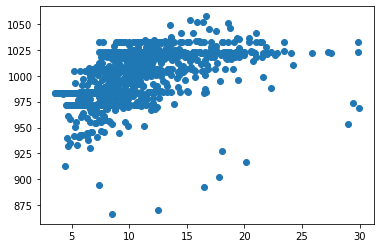

In [47]:
plt.scatter(nums, score)

## 2.2.1 Cluster Model 

   revenue_person        grade  Group Count
0        7.855152   984.776820          347
1       13.548367  1024.248967          379
2        7.734301   971.261646          208
3        7.802937   946.860170           37
4       10.666147  1005.407015          246
5       12.467900   893.736799            7


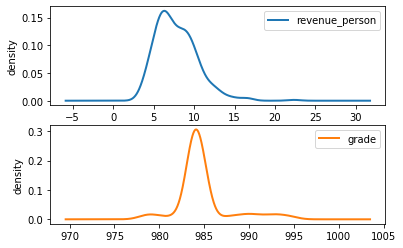

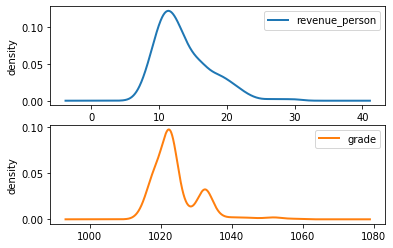

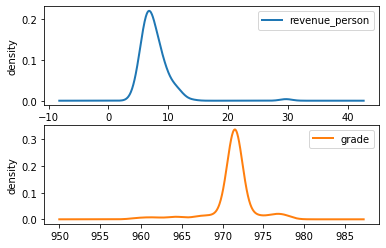

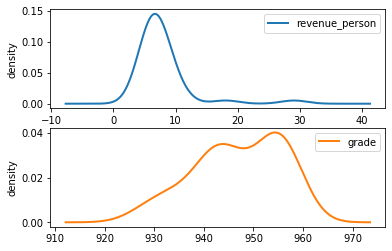

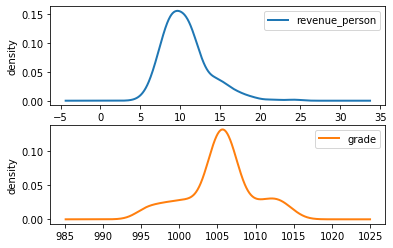

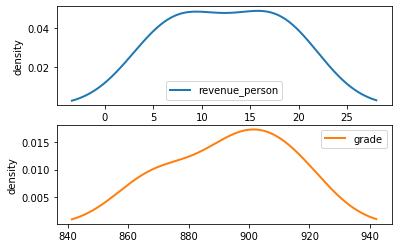

In [48]:
inputfile = 'data/temp1.csv' 
outputfile = 'data/fenlei2.xlsx'
k = 6                       
iteration = 500             

data = pd.read_csv(inputfile, header=None,names=['revenue_person','grade']) 

# k-means
kmodel = KMeans(n_clusters = k, n_jobs = 4) 
kmodel.fit(data)

r1 = pd.Series(kmodel.labels_).value_counts()  
r2 = pd.DataFrame(kmodel.cluster_centers_)    
r = pd.concat([r2, r1], axis = 1) 
r.columns = list(data.columns) + [u'Group Count'] 
print(r)
a = r

r = pd.concat([data, pd.Series(kmodel.labels_, index = data.index)], axis = 1)  
r.columns = list(data.columns) + [u'Group Type'] 
r.to_excel(outputfile) 

def density_plot(data):  
    p = data.plot(kind='kde', linewidth = 2, subplots = True, sharex = False)
    [p[i].set_ylabel('density') for i in range(2)]
    plt.legend()
    return plt

for i in range(k):
    density_plot(data[r[u'Group Type']==i])

[[-1.53657706 -0.56650425]
 [-0.08622569 -0.56650425]
 [-1.24802081 -0.56650425]
 ...
 [ 0.50403485  1.03809219]
 [ 0.8412953   1.03809219]
 [ 2.7910747   1.03809219]]


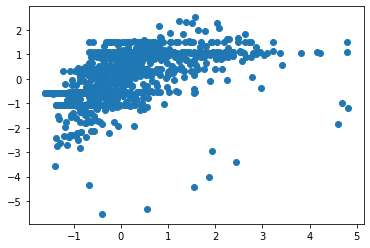

In [49]:
from sklearn.preprocessing import StandardScaler
stdscaler = StandardScaler()
states6 = np.column_stack((nums,score))
states7 = stdscaler.fit_transform(states6)
print(states7)
plt.scatter(states7[:, 0], states7[:, 1], marker='o')
plt.show()

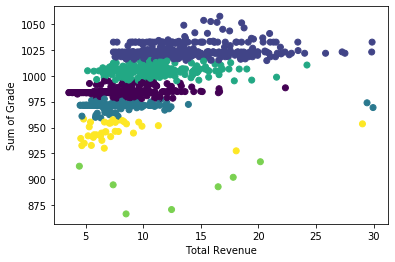

In [50]:
from sklearn.cluster import KMeans


n = 6
cls = KMeans(n_clusters=n)
y_pred = cls.fit_predict(states6)
plt.scatter(states6[:, 0], states6[:, 1], c=y_pred)
plt.xlabel("Total Revenue")
plt.ylabel("Sum of Grade")
plt.show()

In [51]:
center = cls.cluster_centers_
labels = cls.labels_

# num of each cluster
print("Num of each cluster:",end='')
for i in range(n):
    print(len(states6[labels==i]),end=' ')
print()

meanlist_i = []
meanlist_g = []
# grade mean and std
for i in range(2):
    for j in range(n):
        mean = states6[labels==j][:,i].mean()
        std = states6[labels==j][:,i].std()
        if i==0:
            meanlist_i.append(mean)
            print("Invest--Mean: {:<20}, Std: {:<20}".format(mean,std))
        if i==1:
            meanlist_g.append(mean)
            print("Grade --Mean: {:<20}, Std: {:<20}".format(mean,std))

Num of each cluster:348 379 207 246 7 37 
Invest--Mean: 7.865263405397663   , Std: 2.573444640782093   
Invest--Mean: 13.54836667074238   , Std: 3.9901776404000047  
Invest--Mean: 7.716719194630812   , Std: 2.776199123125049   
Invest--Mean: 10.666146594643497  , Std: 2.886101316068674   
Invest--Mean: 12.467899619869906  , Std: 5.475072794654832   
Invest--Mean: 7.802936516075323   , Std: 4.257016563408049   
Grade --Mean: 984.7572445367853   , Std: 2.9178862148681146  
Grade --Mean: 1024.2489667701093  , Std: 6.652028852060732   
Grade --Mean: 971.2292648132507   , Std: 2.63754549030269    
Grade --Mean: 1005.4070149760248  , Std: 4.347158395462308   
Grade --Mean: 893.7367991248915   , Std: 17.86304526172034   
Grade --Mean: 946.8601699299926   , Std: 8.577403024675272   


[(7.716719194630812, 971.2292648132507), (7.802936516075323, 946.8601699299926), (7.865263405397663, 984.7572445367853), (10.666146594643497, 1005.4070149760248), (12.467899619869906, 893.7367991248915), (13.54836667074238, 1024.2489667701093)]


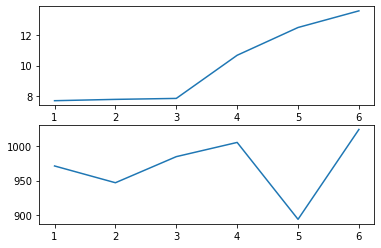

In [52]:
meanlist = list(zip(meanlist_i,meanlist_g))
meanlist_sort = sorted(meanlist,key=lambda x:x[0])
print(meanlist_sort)
meanlist_ii = [i[0] for i in meanlist_sort]
meanlist_gg = [i[1] for i in meanlist_sort]
plt.subplot(211)
plt.plot(range(1,7),meanlist_ii)
plt.subplot(212)
plt.plot(range(1,7),meanlist_gg)

For the cluster model, we find that we cannot get any result from it. So we consider that this model cannot match with this dataset. For the next part, we are going to try other models.

## 2.2.2 Neurons Network

In [53]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow import keras

Normalization

In [45]:
nums = nums / 100
score = score / 1300

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(nums, score, test_size=0.2, random_state=42)
X_train_2d = np.reshape(X_train,(-1,1))
X_test_2d = np.reshape(X_test,(-1,1))

Neurons Network

In [62]:
def build_model():
  model = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu,
                       input_shape=(np.reshape(nums,(-1,1)).shape[1],)),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu,input_shape=(np.reshape(nums,(-1,1)).shape[1],)),
    keras.layers.Dense(64, activation=tf.nn.relu,input_shape=(np.reshape(nums,(-1,1)).shape[1],)),
    keras.layers.Dense(64, activation=tf.nn.relu,input_shape=(np.reshape(nums,(-1,1)).shape[1],)),
    keras.layers.Dense(64, activation=tf.nn.relu,input_shape=(np.reshape(nums,(-1,1)).shape[1],)),
    keras.layers.Dense(64, activation=tf.nn.relu,input_shape=(np.reshape(nums,(-1,1)).shape[1],)),
    keras.layers.Dense(64, activation=tf.nn.relu,input_shape=(np.reshape(nums,(-1,1)).shape[1],)),
    keras.layers.Dense(64, activation=tf.nn.relu,input_shape=(np.reshape(nums,(-1,1)).shape[1],)),
    keras.layers.Dense(1)
  ])

  optimizer = tf.compat.v1.train.RMSPropOptimizer(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])
  return model

model = build_model()
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 64)                128       
_________________________________________________________________
dense_41 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_42 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_43 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_44 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_45 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_46 (Dense)             (None, 64)               

In [74]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 500

# Store training stats
history2 = model.fit(nums, score, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

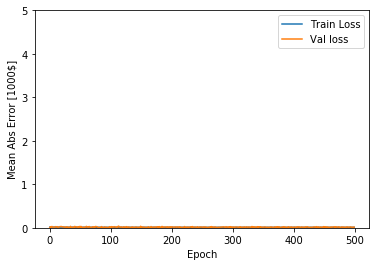

In [75]:
import matplotlib.pyplot as plt


def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [1000$]')
  plt.plot(history.epoch, np.array(history.history['mae']),
           label='Train Loss')
  #print(np.array(history.history['loss']))
  plt.plot(history.epoch, np.array(history.history['val_mae']),
           label = 'Val loss')
  plt.legend()
  plt.ylim([0, 5])

plot_history(history2)


...................................................................

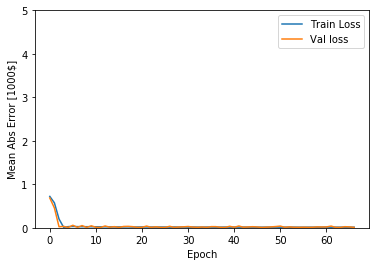

In [76]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_mae', patience=20)

history2 = model.fit(nums, score, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[early_stop, PrintDot()])

plot_history(history2)

In [77]:
[loss, mae] = model.evaluate(X_test, y_test, verbose=0)
print("Testing set Mean Abs Error: ${:7.2f}".format(mae * 1000))

Testing set Mean Abs Error: $  14.87


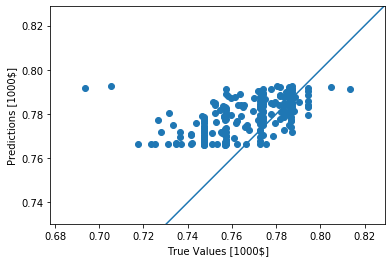

In [78]:
test_predictions = model.predict(X_test).flatten()

plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [1000$]')
plt.ylabel('Predictions [1000$]')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_ = plt.plot([-100, 100], [-100, 100])

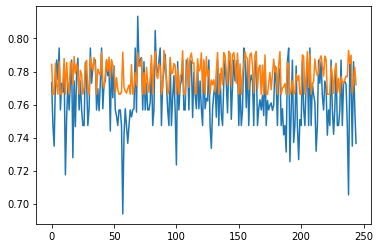

In [79]:
plt.plot(y_test)
plt.plot(test_predictions)

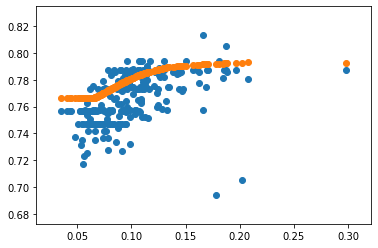

In [80]:
plt.scatter(X_test, y_test, marker='o')
plt.scatter(X_test, test_predictions, marker='o')

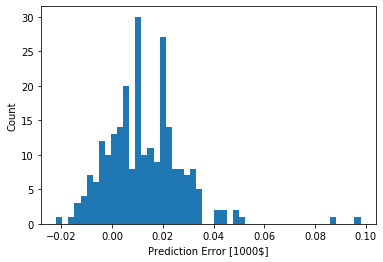

In [81]:
error = test_predictions - y_test
plt.hist(error, bins = 50)
plt.xlabel("Prediction Error [1000$]")
_ = plt.ylabel("Count")

For the neurons network model, we can see although the error is not very high, the prediction is very bad comparing with the observed data. So we should try other models.

## 2.2.3 Random Forest

Random Forest

In [143]:
# resize the dataset, the unit for revenue per student is $
X_train_2d_RF = X_train_2d * 100000
y_train_RF = y_train * 1300
X_test_2d_RF = X_test_2d * 100000
y_test_RF = y_test * 1300

In [144]:
X_train_2d_RF

array([[10566.57687186],
       [10775.59103981],
       [ 5278.40865216],
       [ 9606.57760507],
       [ 7861.36134106],
       [19761.81313283],
       [ 9119.21465579],
       [29865.60455698],
       [ 4012.26063673],
       [ 9944.22043011],
       [10987.63373067],
       [11373.7743774 ],
       [12172.77628721],
       [ 5940.43997425],
       [15818.36123172],
       [12115.42847996],
       [12456.1629123 ],
       [13620.6423445 ],
       [ 8754.37875136],
       [ 8326.17871451],
       [ 8854.68732716],
       [ 6410.88946109],
       [10527.04251233],
       [12917.76955065],
       [12062.55967067],
       [ 8965.4223005 ],
       [ 6350.92517046],
       [ 6623.67383018],
       [ 7735.15633708],
       [11518.97828913],
       [10206.9646581 ],
       [ 5176.81383796],
       [10629.39075821],
       [ 7433.77964518],
       [13170.82198351],
       [ 7090.64498848],
       [13519.42915108],
       [ 6358.87491238],
       [ 7307.20938964],
       [18187.9618549 ],


In [145]:
from sklearn.ensemble import RandomForestClassifier
import time
start = time.time()
model = RandomForestClassifier(n_estimators=12, random_state=50)
forest = model.fit(X_train_2d_RF, y_train_RF.astype('int'))
yfit = model.predict(X_test_2d_RF)
end = time.time()
print("takes time: ", end-start)

takes time:  0.13278889656066895


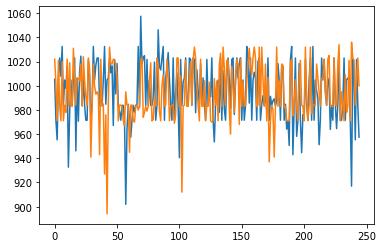

In [146]:
plt.plot(y_test_RF)
plt.plot(yfit)

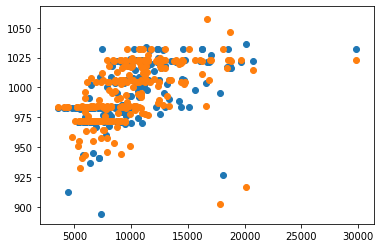

In [147]:
plt.scatter(X_test_2d_RF,yfit)
plt.scatter(X_test_2d_RF,y_test_RF)

For random forest model, the prediction is pretty matched with the observed value.

## 2.2.4 Multinomial Naive Bayes Classifier

multinomial naive Bayes classifier

In [148]:
from sklearn.naive_bayes import MultinomialNB
import time
start = time.time()
model = MultinomialNB()
model.fit(X_train_2d_RF, y_train_RF.astype('int'));
yfit = model.predict(X_test_2d_RF)
end = time.time()
print("takes time: ", end-start)

takes time:  0.10121870040893555


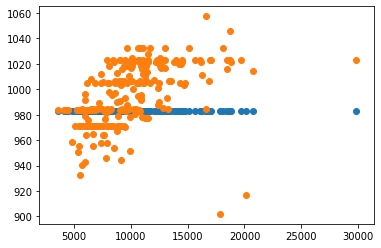

In [149]:
plt.scatter(X_test_2d_RF,yfit)
plt.scatter(X_test_2d_RF,y_test_RF)

The prediction does not work.

## 2.2.5 Gaussian naive bayes

Gaussian naive bayes

In [150]:
from sklearn.naive_bayes import GaussianNB
import time
start = time.time()
model = GaussianNB()
model.fit(X_train_2d_RF, y_train_RF.astype('int'));
yfit = model.predict(X_test_2d_RF)
end = time.time()
print("takes time: ", end-start)

takes time:  0.035042762756347656


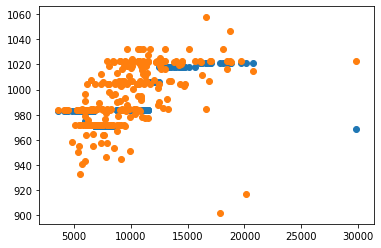

In [151]:
plt.scatter(X_test_2d_RF,yfit)
plt.scatter(X_test_2d_RF,y_test_RF)

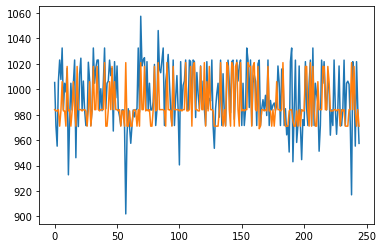

In [152]:
plt.plot(y_test_RF)
plt.plot(yfit)

The prediction is not bad, but not all the points can be predicted.

## 2.2.6 Decision Tree Classifier Estimator

DecisionTreeClassifier estimator

In [153]:
from sklearn.tree import DecisionTreeClassifier
import time
start = time.time()
model = DecisionTreeClassifier().fit(X_train_2d_RF, y_train_RF.astype('int'))
yfit = model.predict(X_test_2d_RF)
end = time.time()
print("takes time: ", end-start)

#accuracy score
from sklearn.metrics import accuracy_score
print("accuracy: ", accuracy_score(y_test_RF.astype('int'), yfit))

takes time:  0.011434078216552734
accuracy:  0.11836734693877551


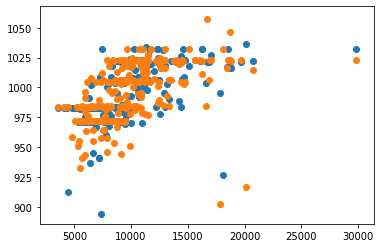

In [154]:
plt.scatter(X_test_2d_RF,yfit)
plt.scatter(X_test_2d_RF,y_test_RF)

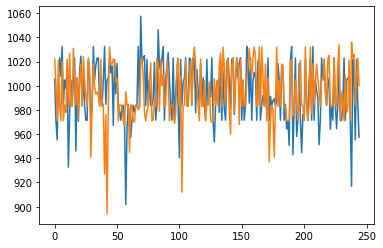

In [155]:
plt.plot(y_test_RF)
plt.plot(yfit)

In fact, the random forest model is the optimizer for the decision tree, so the decision tree model is also matched with the observed data.

## 2.2.7 KNN

KNN

In [156]:
from sklearn.neighbors import KNeighborsClassifier
import time
start = time.time()
model = KNeighborsClassifier(n_neighbors=5)  
model.fit(X_train_2d_RF, y_train_RF.astype('int'))
yfit = model.predict(X_test_2d_RF)
end = time.time()
print("takes time: ", end-start)

#accuracy score
from sklearn.metrics import accuracy_score
print("accuracy: ", accuracy_score(y_test_RF.astype('int'), yfit))

takes time:  0.0362548828125
accuracy:  0.1510204081632653


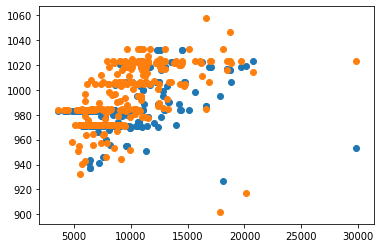

In [157]:
plt.scatter(X_test_2d_RF,yfit)
plt.scatter(X_test_2d_RF,y_test_RF)

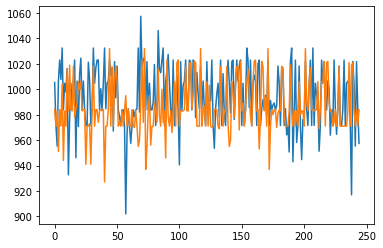

In [158]:
plt.plot(y_test_RF)
plt.plot(yfit)

The KNN model is good for predicting this dataset as well.

## 2.2.8 Logistic Regression

Logistic Regression

In [159]:
from sklearn.linear_model import LogisticRegression
import time
start = time.time()
model = LogisticRegression(solver = 'lbfgs', max_iter=50000, multi_class='auto')
model.fit(X_train_2d_RF, y_train_RF.astype('int'))
yfit = model.predict(X_test_2d_RF)
end = time.time()
print("takes time: ", end-start)

#accuracy score
from sklearn.metrics import accuracy_score
print("accuracy: ", accuracy_score(y_test_RF.astype('int'), yfit))

takes time:  1.4279990196228027
accuracy:  0.15918367346938775


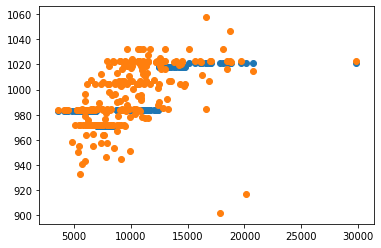

In [160]:
plt.scatter(X_test_2d_RF,yfit)
plt.scatter(X_test_2d_RF,y_test_RF)

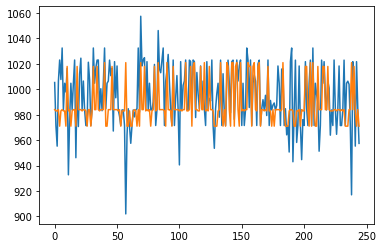

In [161]:
plt.plot(y_test_RF)
plt.plot(yfit)

It is not good enough to predict this dataset.

Here is to try different parameter for logistic regression model

Logistic Regression

In [162]:
from sklearn.linear_model import LogisticRegression
import time
start = time.time()
model = LogisticRegression(C=50. / 60000, penalty='l1', solver='saga', tol=0.1, multi_class='auto')
model.fit(X_train_2d_RF, y_train_RF.astype('int'))
yfit = model.predict(X_test_2d_RF)
end = time.time()
print("takes time: ", end-start)

#accuracy score
from sklearn.metrics import accuracy_score
print("accuracy: ", accuracy_score(y_test_RF.astype('int'), yfit))

takes time:  0.029443025588989258
accuracy:  0.1510204081632653


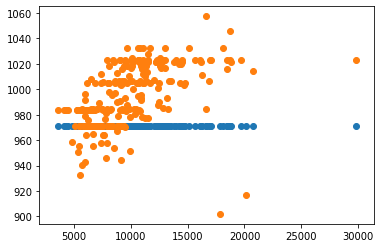

In [163]:
plt.scatter(X_test_2d_RF,yfit)
plt.scatter(X_test_2d_RF,y_test_RF)

The logistic regression model is not good enough.

## 2.2.9 SVM

SVM

In [168]:
from sklearn.svm import SVC
import time
start = time.time()
model = SVC(C=1E6, kernel='rbf', degree=4, gamma="scale")
model.fit(X_train_2d_RF, y_train_RF.astype('int'))
#model.support_vectors_
yfit = model.predict(X_test_2d_RF)
end = time.time()
print("takes time: ", end-start)

#accuracy score
from sklearn.metrics import accuracy_score
print("accuracy: ", accuracy_score(y_test_RF.astype('int'), yfit))

takes time:  352.1384971141815
accuracy:  0.17551020408163265


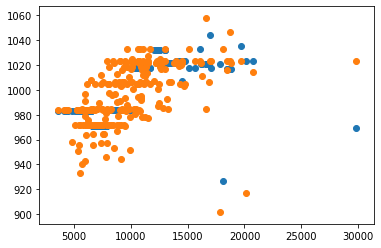

In [169]:
plt.scatter(X_test_2d_RF,yfit)
plt.scatter(X_test_2d_RF,y_test_RF)

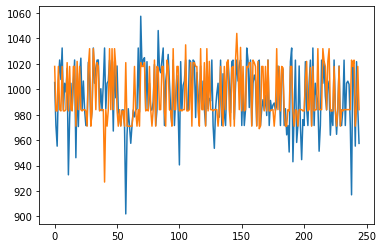

In [170]:
plt.plot(y_test_RF)
plt.plot(yfit)

The prediction for SVM is not bad.

## 2.2.10 Result for models

We tried Cluster Model, Neurons Network, Random Forest, Multinomial Naive Bayes Classifier, Gaussian naive bayes, Decision Tree, KNN, Logistic Regression and SVM. The great models for this dataset are Random Forest, Decision Tree and KNN.

## 3 Overall Result

Create ordered test dataset 

In [312]:
X_test_self = np.arange(5000,25000,250)

In [313]:
from sklearn.ensemble import RandomForestClassifier
import time
start = time.time()
model = RandomForestClassifier(n_estimators=12, random_state=50)
forest = model.fit(X_train_2d_RF, y_train_RF.astype('int'))
yfit = model.predict(X_test_self.reshape(-1,1))
end = time.time()
print("takes time: ", end-start)

takes time:  0.11453914642333984


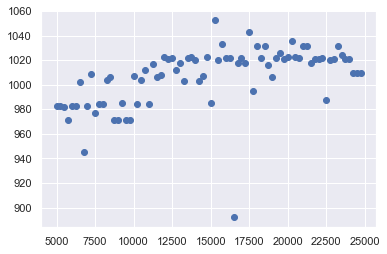

In [314]:
plt.scatter(X_test_self,yfit)

Using polynomial regression to model the test data.

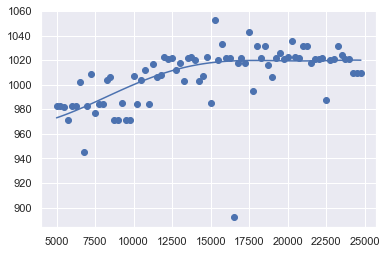

In [315]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

plt.scatter(X_test_self,yfit)

for degree in [6]:
    y_test = PolynomialRegression(degree).fit(X_train_2d_RF, y_train_RF.astype('int')).predict(X_test_self.reshape(-1,1))
    plt.plot(X_test_self.ravel(), y_test, label='degree={0}'.format(degree))
#plt.xlim(-0.1, 1.0)
#plt.ylim(-2, 12)
#plt.legend(loc='best');

Through modeling by polynomial regression, we can see that when the education reveue per person reaches to $15,000, the sutdent grade will not be changed a lot. It means the government spends more than this money, it cannot affect the students grade any more.